In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
def paired_t_test(before, after, alpha=0.05):
    # Step 1: Calculate the differences using a for loop
    differences = []
    for i in range(len(before)):
        differences.append(after[i] - before[i])
    
    # Step 2: Basic stats
    n = len(differences)
    mean_diff = np.mean(differences)  # Mean of the differences
    std_diff = np.std(differences, ddof=1)  # Sample standard deviation of differences
    
    # Step 3: Standard error of the mean difference (SEM)
    sem = std_diff / np.sqrt(n)
    # Step 4: T-statistic calculation
    t_stat = mean_diff / sem
    
    # Step 5: Degrees of freedom
    df = n - 1
    
    # Step 6: p-value calculation (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    
    # Step 7: Visualization
    x = np.linspace(-5, 5, 1000)
    y = stats.t.pdf(x, df)
    
    # Plot the t-distribution
    plt.plot(x, y, label=f't-distribution (df={df})')
    
    # Shade rejection regions (alpha level)
    plt.fill_between(x, y, where=(x <= stats.t.ppf(alpha / 2, df)) | (x >= stats.t.ppf(1 - alpha / 2, df)),
                     color='red', alpha=0.5, label="Rejection Region (α=0.05)")
    
    # Plot the t-statistic
    plt.axvline(t_stat, color='black', linestyle='--', label=f'T-statistic: {t_stat:.2f}')
    
    # Labels and title
    plt.title('Paired T-Test: T-Distribution with T-Statistic')
    plt.xlabel('t-value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()
    
    # Print the results
    print(f"Mean of differences: {mean_diff:.2f}")
    print(f"Standard deviation of differences: {std_diff:.2f}")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    # Decision rule
    if p_value < alpha:
        print("Reject H₀: The treatment has a significant effect.")
    else:
        print("Fail to Reject H₀: No significant effect.")

# Example usage of the paired t-test function:

In [3]:
def one_sample_t_test(data, population_mean, alpha=0.05):
    sample_mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    sem = std_dev / np.sqrt(len(data))
    
    t_stat = (sample_mean - population_mean) / sem
    df = len(data) - 1
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    
    # Plot t-distribution
    x = np.linspace(-5, 5, 1000)
    y = stats.t.pdf(x, df)
    plt.plot(x, y, label=f'T-distribution (df={df})')
    plt.fill_between(x, y, where=(x <= stats.t.ppf(alpha / 2, df)) | (x >= stats.t.ppf(1 - alpha / 2, df)),
                     color='red', alpha=0.5, label="Rejection Region")
    plt.axvline(t_stat, color='black', linestyle='--', label=f'T-statistic: {t_stat:.2f}')
    
    plt.title('One-Sample T-Test: T-Distribution with T-Statistic')
    plt.xlabel('t-value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < alpha:
        print("Reject H₀: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to Reject H₀: No significant difference.")


In [4]:
def two_sample_t_test(group1, group2, alpha=0.05):
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Plotting
    plt.hist(group1, bins=10, alpha=0.5, label='Group 1', color='skyblue')
    plt.hist(group2, bins=10, alpha=0.5, label='Group 2', color='orange')
    plt.title('Two-Sample T-Test')
    plt.xlabel('Data Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    return p_value

In [5]:
def z_test(data, population_mean, alpha=0.05):
    # Z-test assuming known population standard deviation
    sample_mean = np.mean(data)
    std_dev = np.std(data, ddof=0)  # Population std dev
    n = len(data)
    z_stat = (sample_mean - population_mean) / (std_dev / np.sqrt(n))
    
    # P-value for two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # Boxplot
    plt.boxplot(data)
    plt.title('Z-Test: Boxplot')
    plt.ylabel('Value')
    plt.show()
    
    print(f"Z-statistic: {z_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    # Decision rule
    if p_value < alpha:
        print("Reject H₀: The sample mean is significantly different from the population mean.")
    else:
        print("Fail to Reject H₀: No significant difference.")



In [6]:

# Function to detect outliers using IQR method and visualize them
def detect_outliers(data):
    # Calculate the first (Q1) and third quartiles (Q3) and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers (data points outside the IQR bounds)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Visualize the data and outliers
    
    # Plot the boxplot (adjust width to avoid excessive wideness)
    sns.boxplot(data=data, width=0.1)  # Adjust width to make it look better
    
    # Plot the outliers as red dots on the boxplot
    for outlier in outliers:
        plt.plot(0, outlier, 'ro', markersize=4)  # 'ro' for red circles
    
    # Add labels and title
    plt.title("Boxplot with Outliers Highlighted", fontsize=14)
    plt.xlabel("Data")
    plt.ylabel("Values")
    plt.show()

    # Print outliers and the bounds
    print(f"Outliers detected: {outliers}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

    return outliers, lower_bound, upper_bound


In [7]:
def quick_overview(before, after, population_mean, alpha=0.05):
    print("\nOutlier Detection (before):")
    detect_outliers(before)
    
    print("\nOutlier Detection (after):")
    detect_outliers(after)
    
    print("\nT-Test for Paired Data:")
    paired_t_test(before, after, alpha)
    
    print("\nZ-Test for Population Mean:")
    z_test(before, population_mean, alpha)



Outlier Detection (before):


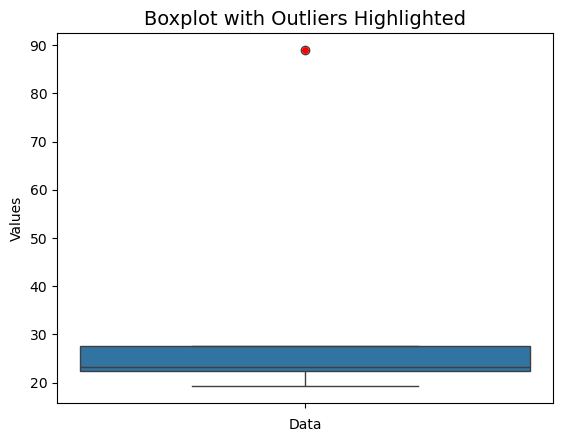

Outliers detected: [89]
Lower bound: 14.786203004999999
Upper bound: 35.312517045

Outlier Detection (after):


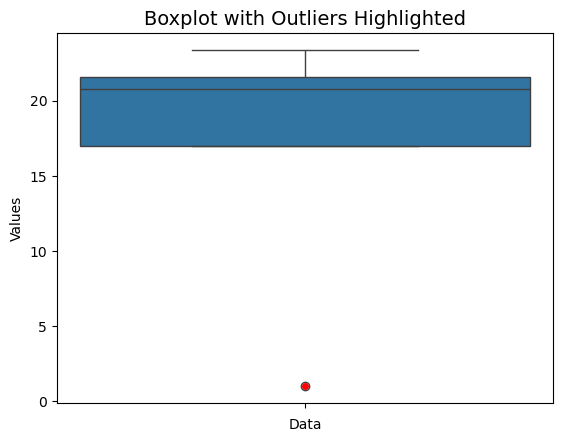

Outliers detected: [1]
Lower bound: 10.083786029999999
Upper bound: 28.466296110000002

T-Test for Paired Data:


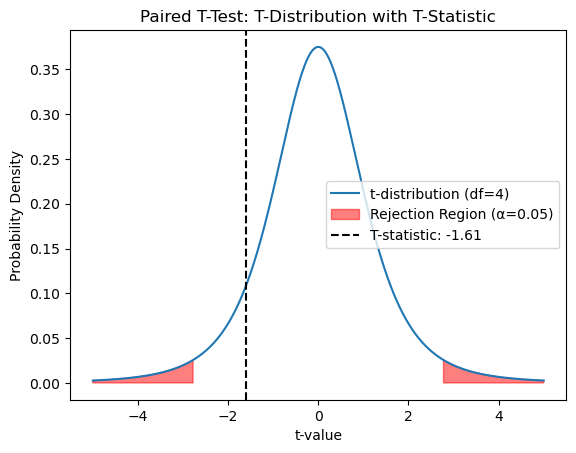

Mean of differences: -19.58
Standard deviation of differences: 27.24
T-statistic: -1.61
P-value: 0.1832
Fail to Reject H₀: No significant effect.

Z-Test for Population Mean:


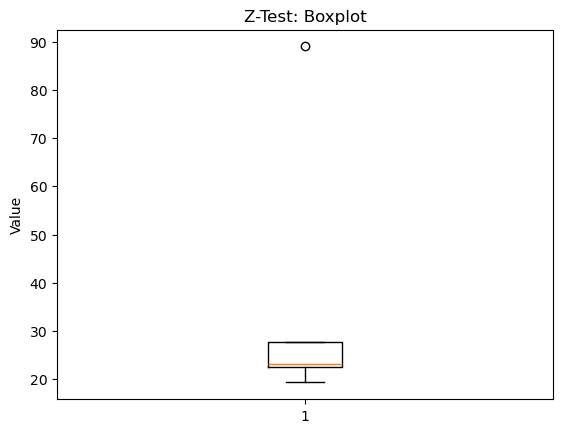

Z-statistic: 1.34
P-value: 0.1811
Fail to Reject H₀: No significant difference.


In [8]:
before = [22.48357077, 19.30867849, 23.23844269, 27.61514928, 89]
after = [1, 20.79354677, 21.57285483, 16.97722731, 23.38714288]
population_mean = 20.5

quick_overview(before, after, population_mean)